# HIGH-DIMENSIONAL DATA.

A dataset is said to be high-dimensional if it contains more characteristics (p) than 
observations (N), which is frequently expressed as p > >N

The challenge with high-dimensional data is that it can be difficult to explore, visualize, and analyze.

Traditional statistical techniques may not be applicable due to issues with multicollinearity, overfitting, and high computational complexit



One common mistake people make is assuming that “high dimensional data” simply means a dataset that has a lot of features. However, that’s incorrect. A dataset could have 10,000 features, but if it has 100,000 observations then it’s not high dimensional.
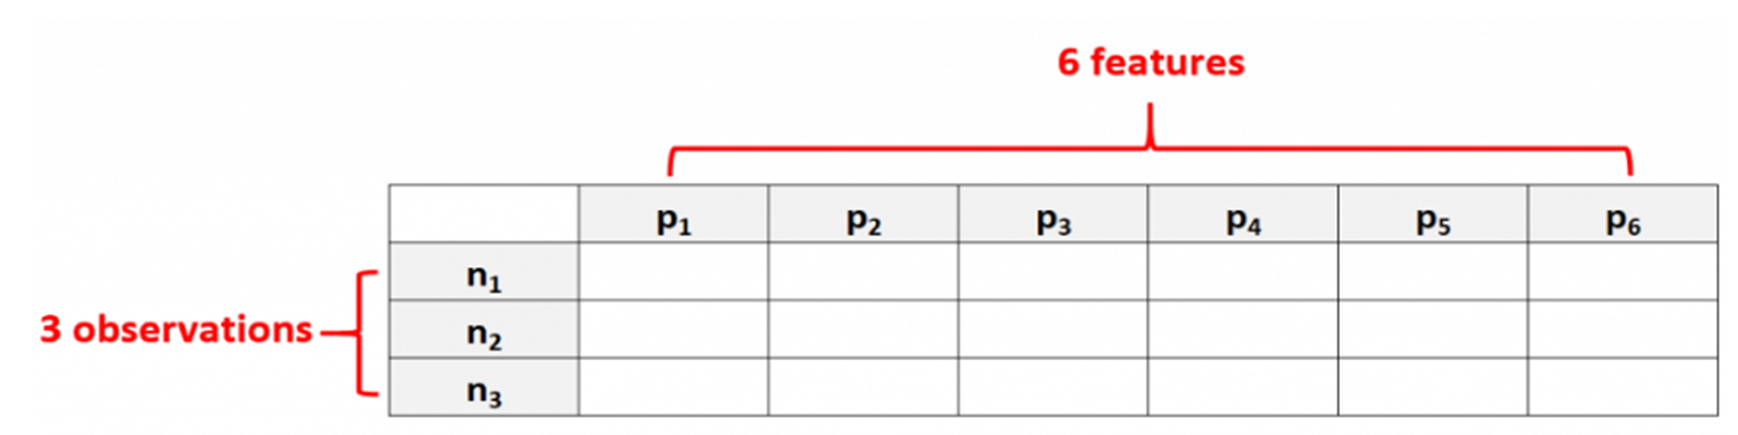

The challenge with high-dimensional data is that it can be difficult to explore, visualize, and analyze.

 Traditional statistical techniques may not be applicable due to issues with multicollinearity, overfitting, and high computational complexity. 
 
Therefore, specialized methods have been developed for high-dimensional data analysis, such as principal component analysis, clustering, and classification algorithms.


Another issue with high-dimensional data is the curse of dimensionality, which refers to the fact that as the number of dimensions increases, the amount of data required to obtain statistically meaningful results grows exponentially. This can lead to sparsity, where the majority of data points are far apart from each other, making it difficult to identify meaningful patterns or relationships.


# HIGH-DIMENSIONAL DATA REPRESENTATION (IMAGES, TEXT, AUDIO, AND VIDEO)

### High-dimensional data representation of images:

High-dimensional data representation of images refers to the mathematical representation of an image as a high-dimensional array or vector. 

 we could represent images of handwritten digits using their pixel intensities as a 784-dimensional vector (28 x 28), where each element of the vector corresponds to the intensity of a single pixel in the image. 
 
 

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)

In [2]:
# defining the size of training and testing data

train_size = 1000
test_size = round(train_size/5)
# importing data 
train_data = pd.read_csv("mnist_train.csv", nrows = train_size)
test_data = pd.read_csv("mnist_test.csv", nrows = test_size)

In [3]:
train_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train_data['label']
y_test = test_data['label']

x_train=train_data.drop("label", axis=1)
x_test=test_data.drop("label", axis=1)

In [5]:
x_train.head()
# it has 784 columns which is nothin but 28 * 28 number of pixels for each fig of number

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
x_train = np.array(x_train)

In [7]:
x_test = np.array(x_test)

In [8]:
x_train[0].reshape((28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

# Displaying the Images

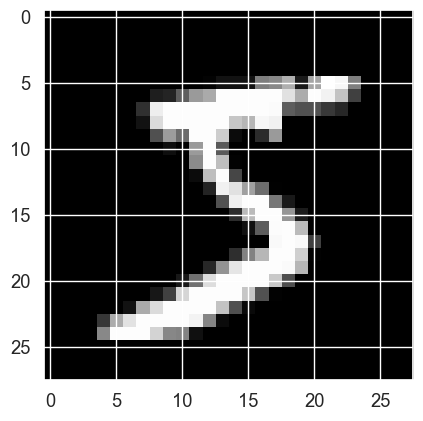

In [9]:
plt.imshow(x_train[0].reshape((28,28)), cmap='gray')
plt.show()

In [10]:
# reshaping the entire training and testing data
x_train = x_train.reshape((train_size, 28,28))

In [11]:
x_test = x_test.reshape((test_size, 28,28))

In [12]:
# checking the shape of the data
print(x_train.shape)
print(x_test.shape)

(1000, 28, 28)
(200, 28, 28)


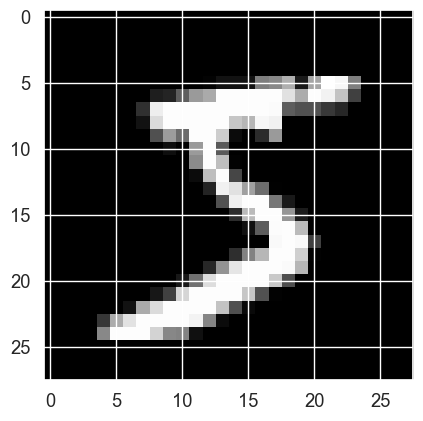

In [13]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

# Fitting the SVM Model

In [14]:
from sklearn import svm # calling library for Support Vector Macnine

# for using SVM, we have to change the shape of data. we have to keep
#all features or pixels in a single row. hence, we need to make data into two dimensiona

model = svm.SVC()

x_train = x_train.reshape(train_size, 784)
x_test = x_test.reshape(test_size, 784)



In [15]:
print(x_train.shape)
print(x_test.shape)

(1000, 784)
(200, 784)


In [16]:
model.fit(x_train, y_train)  # fitting model with training data

SVC()

In [17]:
y_pred = model.predict(x_test) # predicting y values 
y_pred

array([7, 2, 1, 0, 4, 1, 4, 9, 2, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6,
       4, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2,
       5, 5, 1, 2, 4, 4, 6, 3, 5, 5, 2, 0, 4, 1, 9, 5, 7, 8, 9, 2, 7, 4,
       2, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 7, 9, 7, 9, 6, 2, 7, 8, 4, 7, 5,
       6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4,
       8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 4, 9, 0, 5, 8, 5, 6, 6,
       5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 9, 5, 5,
       1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7,
       1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 4, 0, 5, 1, 6,
       4, 2], dtype=int64)

Let's also write some code so that we can display any image we want from the dataset. This will allow us to compare the predictions to the actual images.

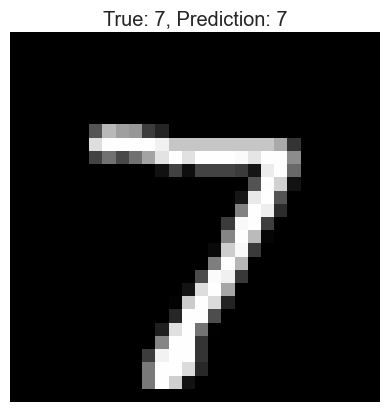

In [18]:
 
index_to_compare = 0
 
title = 'True: ' + str(y_test[index_to_compare]) + ', Prediction: ' + str(y_pred[index_to_compare])
  
plt.title(title)
plt.imshow(x_test[index_to_compare].reshape(28,28), cmap='gray')
plt.grid(None)
plt.axis('off')
plt.show()

In [19]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

confusion_matrix

array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 14,  0,  1,  0,  0,  1,  0,  0],
       [ 0,  0,  1, 12,  0,  3,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 28,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0, 19,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  1,  0, 17,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 22,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  1,  0, 19]], dtype=int64)

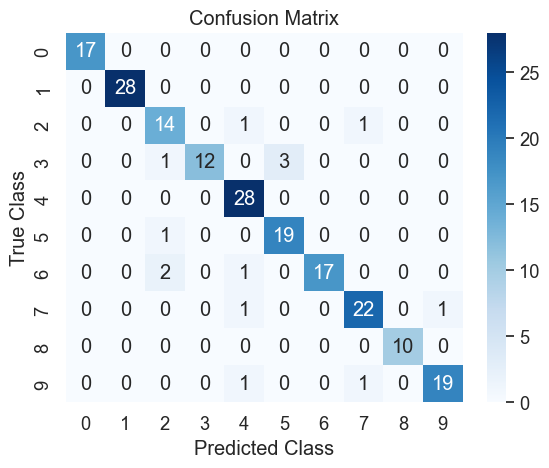

In [20]:
# plot confusion matrix as heatmap
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

# set plot labels and tick marks
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9' ]
tick_marks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')

# show plot
plt.show()

In [21]:
Accuracy = metrics.accuracy_score(y_test, y_pred)

In [22]:
Accuracy

0.93

# High-dimensional data representation of TEXT

In [23]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
train_ds = pd.read_csv( "sentiment_train", delimiter="\t" ) 
train_ds.head( 5 )

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [24]:
pd.set_option('max_colwidth', 800) 
train_ds[train_ds.sentiment == 1][0:5] 
### first five rows when sliced dataframe only has data where sentiment is equal to 1  ###
                                         

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [25]:
train_ds[train_ds.sentiment == 0][0:5] 
### first five rows when sliced dataframe only has data where sentiment is equal to 0  ###

,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


# Exploring the dataset

In [26]:
train_ds.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


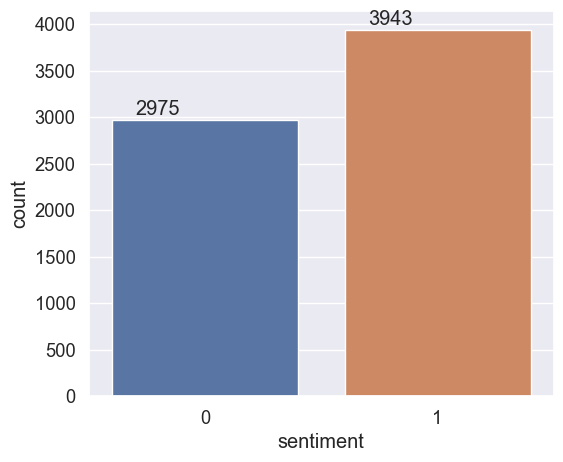

In [27]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 
plt.figure( figsize=(6,5)) 
# create count plot
ax = sn.countplot(x='sentiment', data=train_ds) 
# annotate
for p in ax.patches: 
    ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50)) 

# Text Preprocessing

In [28]:
from sklearn.feature_extraction.text import CountVectorizer 
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer() 
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text ) 
# Get the feature names
features = feature_vector.get_feature_names() 
print( "Total number of features: ", len(features)) 

Total number of features:  2132


In [29]:
import random
random.sample(features, 10) 

['by',
 'mean',
 'says',
 'images',
 'ignore',
 'baby',
 'garrett',
 'just',
 'lesson',
 'played']

In [30]:
train_ds_features = count_vectorizer.transform( train_ds.text ) 
type(train_ds_features) 

scipy.sparse._csr.csr_matrix

In [31]:
train_ds_features.shape 

(6918, 2132)

In [32]:
train_ds_features.getnnz() # gives non zero values in matrix

65398

## Density of the matrix

In [33]:
print( "Density of the matrix: ", 
 train_ds_features.getnnz() * 100 / 
 (train_ds_features.shape[0] * train_ds_features.shape[1])) 
# density of the matrix is even below 1 percent. hence the matrix is sparse

Density of the matrix:  0.4434010415225908


# Displaying Document Vectors

In [34]:
# Converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())  # from converting to todense(), every element of matrix even it is 
                                                            # empty, will be saved or use as memory space
# Setting the column names to the features i.e. words
train_ds_df.columns = features 

In [35]:
train_ds[0:2]  # checking what was earlier

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."


In [36]:
train_ds_df.iloc[0:1, 0:10] 

,00,007,10,10pm,12,16,17,1984,1st,200
0,0,0,0,0,0,0,0,0,0,0


In [53]:
train_ds_df.iloc[0:4, 150:160] # calling some other columns

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward,axes,azkaban,baby
0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0


In [38]:
train_ds_df[['the', 'da', "vinci", "code", "book", 'is', 'just', 'awesome']][0:1] 

,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,1,1,1,1


## TF-IDF (Term Frequency-Inverse Document Frequency)

TF-IDF (Term Frequency-Inverse Document Frequency) is a popular technique for weighting words in text data for machine learning applications such as text classification, clustering, and information retrieval. The TfidfVectorizer class in scikit-learn library is a convenient way to compute TF-IDF vectors from text data in Python.

The TF (term frequency) component of TF-IDF measures how frequently a word appears in a document. It is calculated by dividing the number of times a word appears in a document by the total number of words in the document.

The IDF (inverse document frequency) component of TF-IDF measures how rare or common a word is in a corpus of documents. It is calculated by taking the logarithm of the total number of documents in the corpus divided by the number of documents that contain the word.

The TF-IDF score for a given word in a document is the product of its TF and IDF values. The higher the TF-IDF score for a word in a document, the more important or relevant that word is to the document.




Here's an example of how to use the TfidfVectorizer in Python:

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create a list of text documents
documents = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]

# create an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# fit and transform the text data
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)

# view the TF-IDF matrix
print(tfidf_matrix)
# In this example, we first import the TfidfVectorizer class from the sklearn.feature_extraction.text module.
# Next, we create a list of text documents to analyze. 
# We then create an instance of the TfidfVectorizer class and fit and transform the text data using the fit_transform() method.
#Finally, we print the resulting TF-IDF matrix.

# The TfidfVectorizer class has many options that you can use to customize the way it computes TF-IDF vectors,
# such as specifying the maximum number of features, the n-gram range, 
# and the stop words to exclude. You can also use the transform() method of the fitted
# TfidfVectorizer object to transform new text data using the same vocabulary as the training data.







  (0, 1)	0.46979138557992045
  (0, 2)	0.5802858236844359
  (0, 6)	0.38408524091481483
  (0, 3)	0.38408524091481483
  (0, 8)	0.38408524091481483
  (1, 5)	0.5386476208856763
  (1, 1)	0.6876235979836938
  (1, 6)	0.281088674033753
  (1, 3)	0.281088674033753
  (1, 8)	0.281088674033753
  (2, 4)	0.511848512707169
  (2, 7)	0.511848512707169
  (2, 0)	0.511848512707169
  (2, 6)	0.267103787642168
  (2, 3)	0.267103787642168
  (2, 8)	0.267103787642168
  (3, 1)	0.46979138557992045
  (3, 2)	0.5802858236844359
  (3, 6)	0.38408524091481483
  (3, 3)	0.38408524091481483
  (3, 8)	0.38408524091481483


In [40]:
tfidf_vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

In [41]:
tfidf_matrix.toarray()

array([[0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524],
       [0.        , 0.6876236 , 0.        , 0.28108867, 0.        ,
        0.53864762, 0.28108867, 0.        , 0.28108867],
       [0.51184851, 0.        , 0.        , 0.26710379, 0.51184851,
        0.        , 0.26710379, 0.51184851, 0.26710379],
       [0.        , 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.        , 0.38408524, 0.        , 0.38408524]])

# High-dimensional data representation of audio

Audio data is typically high-dimensional, meaning it consists of a large number of features. To represent audio data in a more manageable way, various techniques can be used to reduce the dimensionality of the data while retaining its essential features.

One common technique for high-dimensional data representation of audio is to use a spectrogram. A spectrogram is a visual representation of the spectrum of frequencies in an audio signal as it varies with time. It can be thought of as a two-dimensional image, with time on one axis and frequency on the other. By analyzing the spectrogram, it is possible to identify patterns and structures in the audio data.


Sample rate, also known as sampling frequency, is the number of samples of audio that are taken per second during analog-to-digital conversion. In other words, it is the rate at which the continuous analog audio waveform is sampled and converted into a series of discrete digital values that can be stored and processed by a computer.

Sample rate is typically measured in Hertz (Hz), which represents the number of samples per second. The most common sample rates for audio are 44.1 kHz and 48 kHz, which are used for CDs and digital audio files, respectively. Higher sample rates, such as 96 kHz or 192 kHz, may be used in professional audio applications to capture more detail and provide a wider frequency response, but they also result in larger file sizes.

 samples are individual numerical values that represent the amplitude of an analog audio signal at a specific point in time. In other words, a sample is a digital "snapshot" of the audio waveform at a particular moment in time.

Samples are typically represented as 16-bit or 24-bit integers, although other bit depths are also used. The amplitude of the audio signal is typically represented as a signed integer value, with 0 representing the midpoint of the signal and negative and positive values representing the negative and positive excursions from the midpoint, respectively.

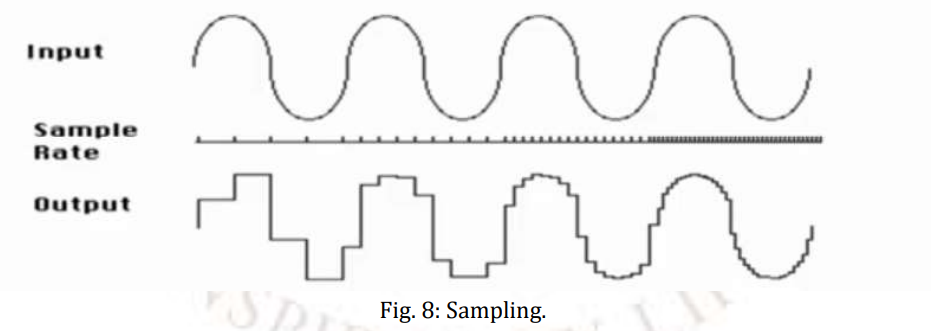

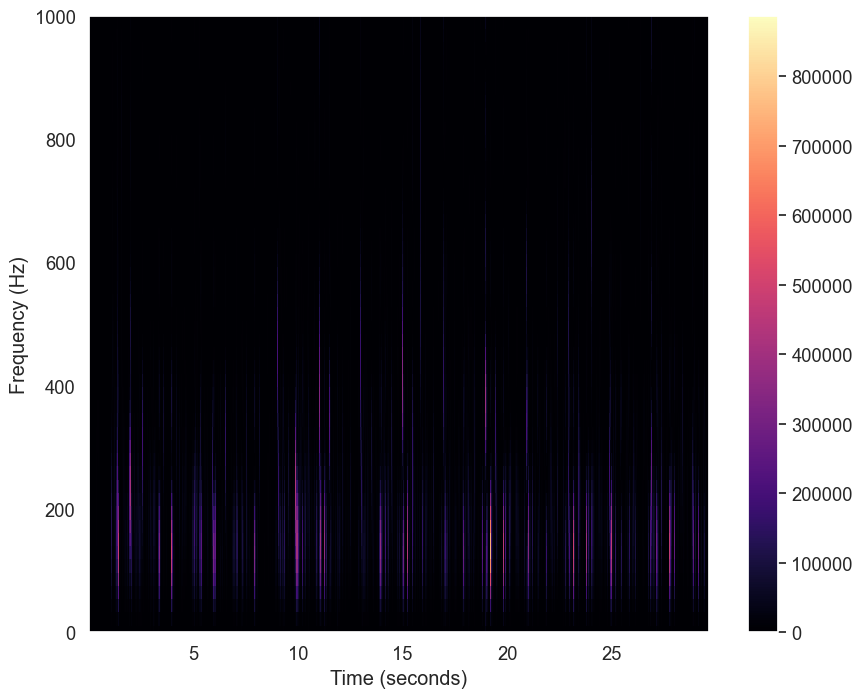

In [42]:
import scipy.io.wavfile as wavfile
import scipy.signal as signal
import matplotlib.pyplot as plt

# Load audio file
sample_rate, samples = wavfile.read('audio.wav')

# Convert stereo to mono if necessary
if len(samples.shape) > 1 and samples.shape[1] > 1:
    samples = (samples[:, 0] + samples[:, 1]) / 2

# Generate spectrogram
frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate, nfft=2048)

# Plot spectrogram
plt.figure(figsize=(10, 8))
plt.pcolormesh(times, frequencies, spectrogram, cmap='magma')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency (Hz)')
plt.ylim([0, 1000])
plt.colorbar()
plt.show()

above code loads an audio file using the wavfile module from scipy, generates a spectrogram using the spectrogram function from scipy.signal, and then plots the spectrogram using matplotlib.

The spectrogram function takes the audio samples and sample rate as input and returns the spectrogram as a 2D array. The pcolormesh function from matplotlib is used to plot the spectrogram as a color-coded image, with time on the x-axis, frequency on the y-axis, and color representing the magnitude of the signal at each time-frequency point. In this example, the cmap parameter is set to 'viridis' to use the Viridis color map.

Note that the y-axis of the spectrogram is limited to 8 kHz using plt.ylim to focus on the most relevant frequency range for most human speech and music. You can adjust this limit to fit your specific use case.

In [43]:
import pandas as pd



pd.options.display.float_format = '{:.5f}'.format

# Create DataFrame from audio data
df = pd.DataFrame(samples, columns=['Amplitude'])

# Add time column to DataFrame
df['Time'] = df.index / sample_rate

# Print DataFrame
print(df)

         Amplitude     Time
0        -90.50000  0.00000
1       -100.00000  0.00002
2        -79.00000  0.00005
3        -82.50000  0.00007
4        -79.50000  0.00009
...            ...      ...
1306619 4567.00000 29.62855
1306620 4639.50000 29.62857
1306621 4597.00000 29.62859
1306622 4475.50000 29.62862
1306623 4266.00000 29.62864

[1306624 rows x 2 columns]


In [44]:

df.head()

,Amplitude,Time
0,-90.50000,0.00000
1,-100.00000,0.00002
2,-79.00000,0.00005
3,-82.50000,0.00007
4,-79.50000,0.00009


In [45]:
df.tail(20)

,Amplitude,Time
1306604,5274.50000,29.62821
1306605,5248.00000,29.62823
1306606,5346.50000,29.62825
1306607,5296.50000,29.62828
1306608,5225.00000,29.62830
1306609,5079.50000,29.62832
1306610,4674.50000,29.62834
1306611,4353.50000,29.62837
1306612,4282.00000,29.62839
1306613,3847.50000,29.62841


In [46]:
sample_rate

44100

below code depicts pictorial representation of amplitude saved digitally with time

In [47]:
samplerate, data = wavfile.read("audio.wav")
print(f"number of channels = {data.shape[1]}")

length = data.shape[0] / samplerate
print(f"length = {length}s")


number of channels = 2
length = 29.628662131519274s


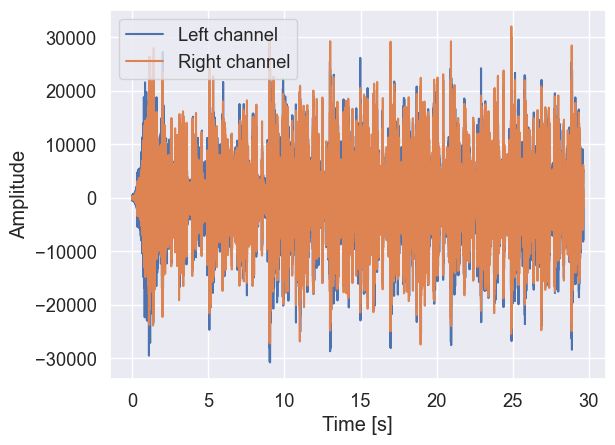

In [48]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data[:, 0], label="Left channel")
plt.plot(time, data[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

In [49]:
data1 = data[0:100]

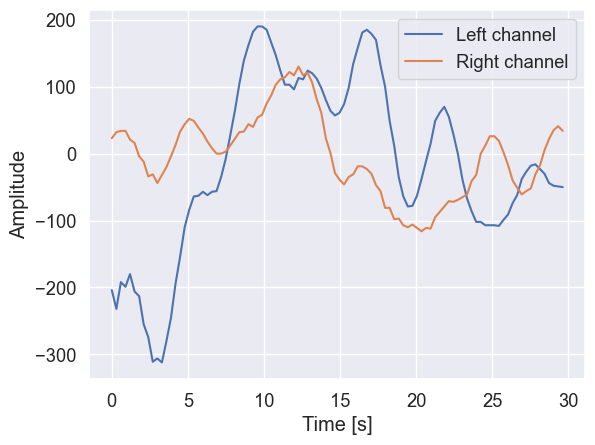

In [50]:
import matplotlib.pyplot as plt
import numpy as np
time = np.linspace(0., length, data1.shape[0])
plt.plot(time, data1[:, 0], label="Left channel")
plt.plot(time, data1[:, 1], label="Right channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

two colors like blue and orange means, it has two channels or sound is stereo

In [54]:
# audit.wav file is stereo
data

array([[-204,   23],
       [-232,   32],
       [-192,   34],
       ...,
       [4938, 4256],
       [4974, 3977],
       [4734, 3798]], dtype=int16)

# Video Data

import cv2

# Read the video file
cap = cv2.VideoCapture('video.mp4')

# Define the frame count
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Loop through each frame and save it as an image
for i in range(frame_count):
    # Read the frame
    ret, frame = cap.read()
    
    # Save the frame as an image
    cv2.imwrite(f'frame_{i}.jpg', frame)
    
# Release the video file
cap.release()
In this code, we first read the video file using the cv2.VideoCapture() function. We then get the total number of frames in the video using the cv2.CAP_PROP_FRAME_COUNT property. We loop through each frame using the cap.read() function and save it as an image using the cv2.imwrite() function. Finally, we release the video file using the cap.release() function.

This code will save each frame of the video as a separate image file with the name frame_x.jpg, where x is the frame number. These images can then be used for further analysis, such as object detection, tracking, or classification.





